<a href="https://www.kaggle.com/code/aabdollahii/drug-labels-side-effects-analysis?scriptVersionId=256616610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# loading data and insights 

In [1]:
import pandas as pd
import numpy as np

# Load dataset 
df = pd.read_csv("/kaggle/input/drug-labels-and-side-effects-dataset-1400-records/realistic_drug_labels_side_effects.csv")

In [2]:
# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())


Shape: (1436, 15)

Columns: ['drug_name', 'manufacturer', 'approval_year', 'drug_class', 'indications', 'side_effects', 'dosage_mg', 'administration_route', 'contraindications', 'warnings', 'price_usd', 'batch_number', 'expiry_date', 'side_effect_severity', 'approval_status']

Missing values per column:
 drug_name               0
manufacturer            0
approval_year           0
drug_class              0
indications             0
side_effects            0
dosage_mg               0
administration_route    0
contraindications       0
warnings                0
price_usd               0
batch_number            0
expiry_date             0
side_effect_severity    0
approval_status         0
dtype: int64


In [3]:
# Sample records
print("\nSample rows:")
display(df.sample(5, random_state=42))


Sample rows:


,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_date,side_effect_severity,approval_status
594,Rivadipine26,Johnson & Johnson,2017,Antiviral,Pain relief,"Diarrhea, Dry mouth",580,Inhalation,Heart disease,Use with caution in elderly,84.03,XG772Dy,2026-06-14,Moderate,Pending
754,Cefdipine81,Pfizer Inc.,1999,Anti-inflammatory,Fever reduction,Constipation,950,Intravenous,Kidney impairment,Use with caution in elderly,486.71,vG592Kr,2027-06-15,Moderate,Approved
630,Viraprofen54,Roche Holding AG,2013,Antiviral,Pain relief,Insomnia,290,Intravenous,Bleeding disorders,Take with food,238.48,XG870Hl,2025-11-07,Mild,Rejected
1259,Virazole38,GlaxoSmithKline,2002,Anti-inflammatory,Pain relief,"Nausea, Blurred vision, Rash",970,Topical,Diabetes,Take with food,58.89,jz375MU,2028-07-20,Moderate,Approved
903,Zylodipine39,Moderna Therapeutics,1992,Antihistamine,Depression treatment,"Constipation, Diarrhea",140,Inhalation,Allergic reaction,Do not discontinue abruptly,290.37,po625ZS,2025-11-03,Mild,Rejected


In [4]:
# Quick text stats — length of indications & side effects text
df['indications_length'] = df['indications'].astype(str).apply(len)
df['effect_length'] = df['side_effects'].astype(str).apply(len)

print("\nAverage indications text length:", round(df['indications_length'].mean(), 2))
print("Average side effects text length:", round(df['effect_length'].mean(), 2))



Average indications text length: 17.81
Average side effects text length: 18.76


In [5]:
# Quick look at unique counts
print("\nUnique drugs count:", df['drug_name'].nunique())
print("Unique side effects count (raw text):", df['side_effects'].nunique())


Unique drugs count: 1337
Unique side effects count (raw text): 435


# EDA

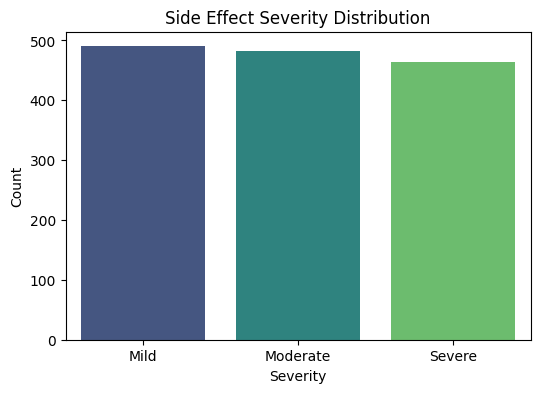

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- 1. Distribution of side effect severity -----
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='side_effect_severity', order=df['side_effect_severity'].value_counts().index, palette='viridis')
plt.title('Side Effect Severity Distribution')
plt.ylabel('Count')
plt.xlabel('Severity')
plt.show()

* This is a balanced datasets that help prediction 

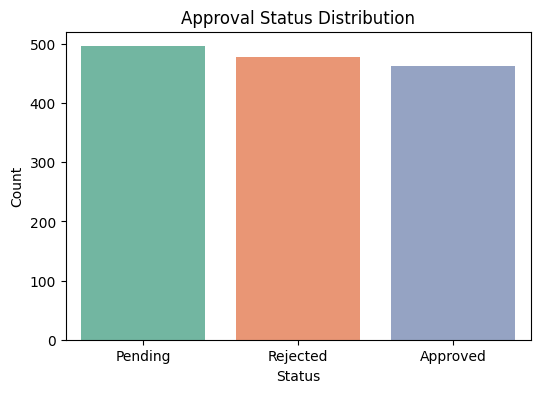

In [7]:
# ----- 2. Approval status breakdown -----
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='approval_status', order=df['approval_status'].value_counts().index, palette='Set2')
plt.title('Approval Status Distribution')
plt.ylabel('Count')
plt.xlabel('Status')
plt.show()

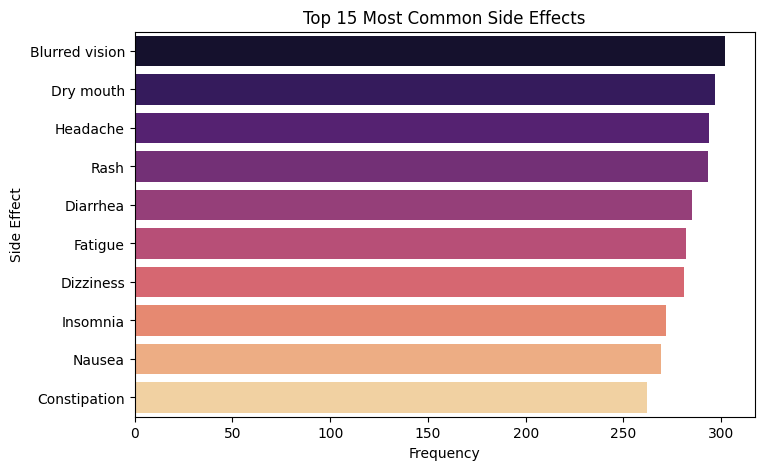

In [8]:
# ----- 3. Top 15 most common side effects -----
# Split comma-separated effects, strip spaces, flatten into one list
all_effects = df['side_effects'].str.split(',').explode().str.strip()
top_effects = all_effects.value_counts().head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=top_effects.values, y=top_effects.index, palette='magma')
plt.title('Top 15 Most Common Side Effects')
plt.xlabel('Frequency')
plt.ylabel('Side Effect')
plt.show()

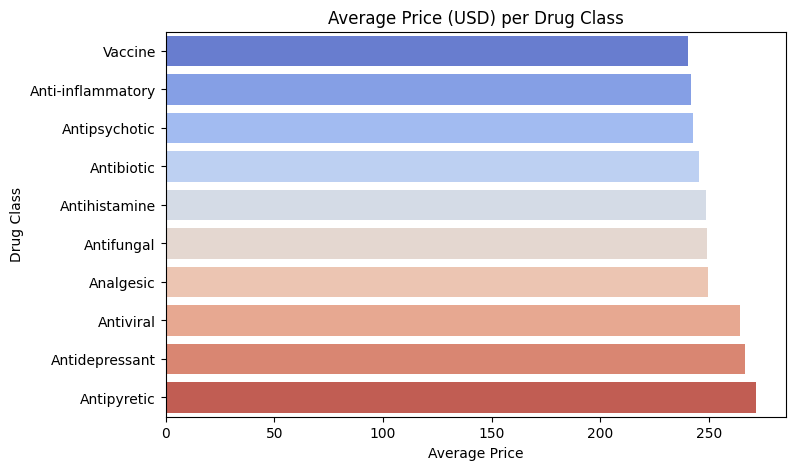

In [9]:
# ----- 4. Mean price per drug class (top 10 classes by count) -----
top_classes = df['drug_class'].value_counts().head(10).index
class_prices = df[df['drug_class'].isin(top_classes)].groupby('drug_class')['price_usd'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=class_prices.values, y=class_prices.index, palette='coolwarm')
plt.title('Average Price (USD) per Drug Class')
plt.xlabel('Average Price')
plt.ylabel('Drug Class')
plt.show()


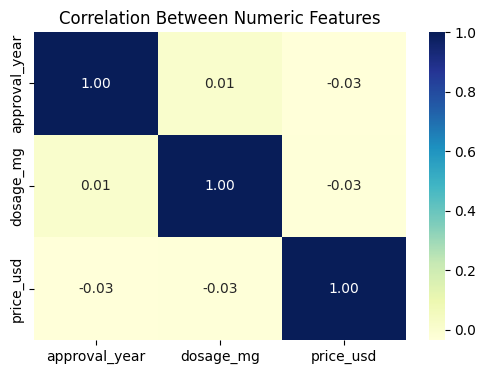

In [10]:
# ----- 5. Correlation heatmap for numeric fields -----
num_cols = ['approval_year', 'dosage_mg', 'price_usd']
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


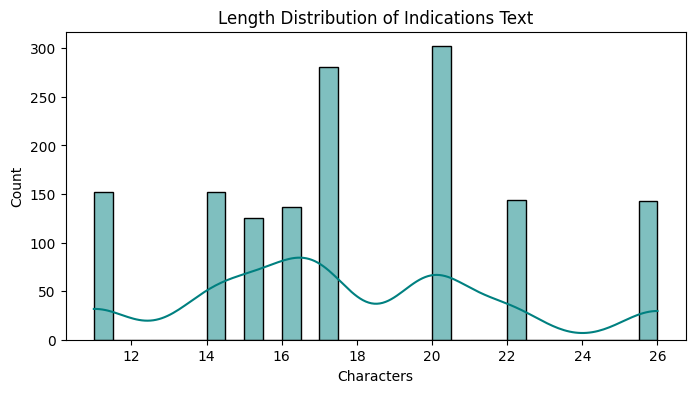

In [11]:
# ----- 6. Quick text length distribution -----
plt.figure(figsize=(8,4))
sns.histplot(df['indications'].astype(str).apply(len), bins=30, kde=True, color='teal')
plt.title('Length Distribution of Indications Text')
plt.xlabel('Characters')
plt.ylabel('Count')
plt.show()

* Side Effect Severity
Counts for Mild, Moderate, and Severe are almost perfectly balanced ( 470–500 each).
This is great — no major class imbalance if we predict severity.
* Approval Status
Pending is slightly higher (500), with Rejected and Approved following closely (470–480 each).
Also balanced → approval status prediction won’t suffer from extreme skew.
* Top 15 Side Effects
The most frequent: Blurred vision, Dry mouth, Headache, Rash, Diarrhea.
Each appears ~300 times.
Notably short phrases → ideal for tokenization or multi‑label binarization.
* Average Price per Drug Class
All top classes have similar price averages (240–270).Antipyretic drugs slightly lead, Vaccine slightly lower.
Price differences may be too small to drive strong predictive separation, but still worth including.

# Preprocessing 

In [12]:
import re
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from datetime import datetime

In [13]:
# ================ TEXT CLEANING ================

def clean_text(text):
    text = str(text).lower().strip()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text)  # collapse multiple spaces
    return text

In [14]:
# Clean main text fields
df['indications_clean'] = df['indications'].apply(clean_text)
df['contraindications_clean'] = df['contraindications'].apply(clean_text)
df['warnings_clean'] = df['warnings'].apply(clean_text)

# Combine them for richer NLP input
df['combined_text'] = df['indications_clean'] + " " + \
                      df['contraindications_clean'] + " " + \
                      df['warnings_clean']

In [15]:
# Split on commas, strip spaces, lowercase
df['side_effects_list'] = df['side_effects'].str.lower().str.split(',').apply(lambda x: [s.strip() for s in x])

# Multi-label binarization
mlb = MultiLabelBinarizer()
side_effects_encoded = mlb.fit_transform(df['side_effects_list'])
side_effects_df = pd.DataFrame(side_effects_encoded, columns=mlb.classes_)
df = pd.concat([df, side_effects_df], axis=1)

In [16]:
#categorical endoding
cat_cols = ['drug_class', 'administration_route', 'approval_status', 'side_effect_severity', 'manufacturer']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col + '_enc'] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
df['expiry_date'] = pd.to_datetime(df['expiry_date'], errors='coerce')
today = datetime.today()
df['days_until_expiry'] = (df['expiry_date'] - today).dt.days

In [18]:
print("Preprocessing complete.")
print("Combined text sample:", df['combined_text'].iloc[0])
print("Side effects list sample:", df['side_effects_list'].iloc[0])
print("Encoded side effect shape:", side_effects_df.shape)

Preprocessing complete.
Combined text sample: allergy relief bleeding disorders avoid alcohol
Side effects list sample: ['fatigue', 'nausea']
Encoded side effect shape: (1436, 10)
